In [1]:
# Necessary imports
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt


In [2]:
# Load data and preprocess
(x_train, _), (x_test, _) = mnist.load_data()

# Standardize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


# Reshape
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Add Noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

# Clip
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

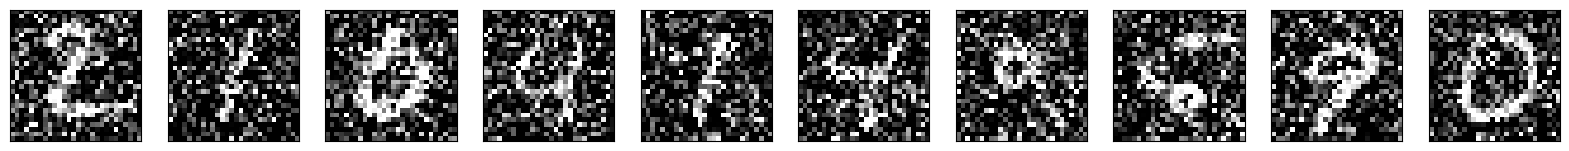

In [3]:
# Visualize Noised Images 
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [4]:
import keras
from keras import layers

# Define CONV AE
# Input dim
input_img = keras.Input(shape=(28, 28, 1))

# Layers
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Concatenate Model
autoencoder = keras.Model(input_img, decoded)

# Compile Model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
# Train AE
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
469/469 [==============================] - 12s 10ms/step - loss: 0.1680 - val_loss: 0.1160
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1127 - val_loss: 0.1083
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1075 - val_loss: 0.1047
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1047 - val_loss: 0.1026
Epoch 5/100
469/469 [==============================] - 3s 7ms/step - loss: 0.1027 - val_loss: 0.1008
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1013 - val_loss: 0.1001
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1002 - val_loss: 0.0989
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0993 - val_loss: 0.0982
Epoch 9/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0987 - val_loss: 0.0976
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.0981 - val_

In [6]:
# Denoise new images (prediction)
conv_autoencoder_denoised_images = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


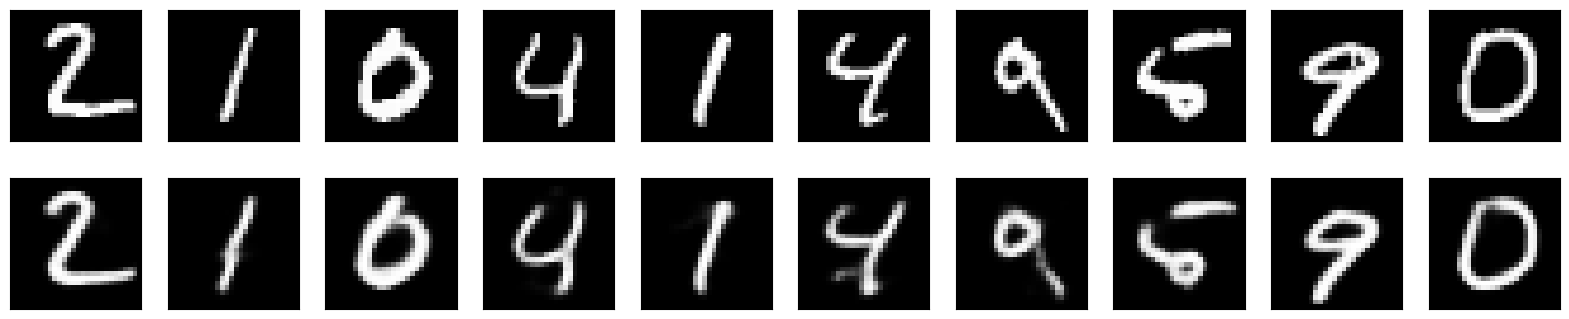

In [7]:
# View Result of Denoising of the Images

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(conv_autoencoder_denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()